## 0.0 Prepare the data 

In [3]:
import pandas as pd
import numpy as np

# Import clean data 
df = pd.read_csv('data_auto.csv')
df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,0,0,3,122,alfa-romero,std,two,convertible,rwd,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,1,1,3,122,alfa-romero,std,two,convertible,rwd,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,2,2,1,122,alfa-romero,std,two,hatchback,rwd,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,3,3,2,164,audi,std,four,sedan,fwd,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,4,4,2,164,audi,std,four,sedan,4wd,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,196,196,196,-1,95,volvo,std,four,sedan,rwd,...,9.5,114.0,5400.0,23,28,16845.0,10.217391,Medium,0,1
197,197,197,197,-1,95,volvo,turbo,four,sedan,rwd,...,8.7,160.0,5300.0,19,25,19045.0,12.368421,High,0,1
198,198,198,198,-1,95,volvo,std,four,sedan,rwd,...,8.8,134.0,5500.0,18,23,21485.0,13.055556,Medium,0,1
199,199,199,199,-1,95,volvo,turbo,four,sedan,rwd,...,23.0,106.0,4800.0,26,27,22470.0,9.038462,Medium,1,0


In [4]:
#only use numeric data
df=df._get_numeric_data()
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


## Functions for graph plotting

In [54]:
%%capture
! pip install ipywidgets
from ipywidgets import interact, interactive, fixed, interact_manual

In [6]:
def Distribution_Graph(RedLine, BlueLine, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedLine, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueLine, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price in USD')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [63]:
def Polynomial_Graph(x_train3, x_test3, y_train3, y_test3, lr,poly_transform):
    #train = training data 
    #test = testing data 
    #lr = linear regression object 
    #poly_transform = polynomial transformation object 
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    #get the max and min values of x
    xmax=max([x_train3.values.max(), x_test3.values.max()])
    xmin=min([x_train3.values.min(), x_test3.values.min()])

    #get a range from xmin to xmax with 0.1 each step as data to input into the polynomial model
    x=np.arange(xmin, xmax, 1)

    
    plt.plot(x_train3, y_train3, 'ro', label='Training Data')
    plt.plot(x_test3, y_test3, 'go', label='Testing Data')
    plt.plot(x, poly.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

## 1.1 Train a linear model

In [19]:
#define what is the x and y variables
y_data = df['price']  #price is something we predict
x_data=df.drop('price',axis=1)

#split the data into training data and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=0) #90% training data, 10% testing data
x_train.shape[0]

180

In [20]:
#Use linear regression to train the model

from sklearn.linear_model import LinearRegression

#create a linear regression model
lre=LinearRegression()

#fit the model with y_train model
lre.fit(x_train[['horsepower']], y_train)


LinearRegression()

In [21]:
#calculate the correlation coefficient using training data
lre.score(x_train[['horsepower']], y_train)

0.6479796296498318

In [22]:
#R^2 = 0.64 indicates that the correlation is actually not very strong

## 1.2 Use cross-validation to evaluate the linear regression (lre) model created above

In [23]:
from sklearn.model_selection import cross_val_score
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [26]:
#get the mean of and the standard deviation of 
print("Mean of the 4 folds =", Rcross.mean(), "Standard deviation of 4 folds =" , Rcross.std())

Mean of the 4 folds = 0.522009915042119 Standard deviation of 4 folds = 0.2911839444756029


## 2.1 Train a muliple linear regression model (lre2) with a few features

In [27]:
#input the training data into the model
lre2 = LinearRegression()
lre2.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression()

In [28]:
#predict the results using the training data
yhat_train = lre2.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test = lre2.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

## 2.2 Visulize the results by calling the Distribution_Graph function

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

c:\users\vicky is stupid\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\vicky is stupid\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


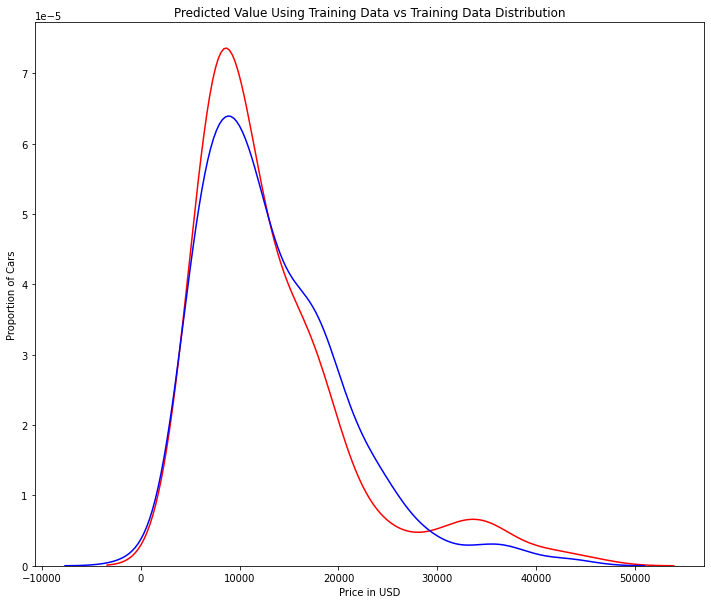

In [31]:
Title = 'Predicted Value Using Training Data vs Training Data Distribution'
#RedLine represents y_train data, BlueLine represents yhat_train data using lre2
Distribution_Graph(y_train, yhat_train, "Actual Values (Training)", "Predicted Values (Training)", Title)

In [ ]:
#The graph above shows that there might be an overfitting of the lre2 model

## 3.1 Use polynomial regression to train the model 

In [64]:
#create a polinomial regression model
from sklearn.preprocessing import PolynomialFeatures

In [65]:
#split the data into training data and testing data
x_train3, x_test3, y_train3, y_test3 = train_test_split(x_data, y_data, test_size=0.45, random_state=0) #55% training data

In [66]:
#polynomial transformation to raise the power for the x variable (polynomial formular: Y=θo + θ₁X + θ₂X² + … + θₘXᵐ + error)
pr = PolynomialFeatures(degree=5) #degree of 5 is chosen 
x_train3_pr = pr.fit_transform(x_train3[['horsepower']])
x_test3_pr = pr.fit_transform(x_test3[['horsepower']])
pr

PolynomialFeatures(degree=5)

In [67]:
#create a polunomial regression model 
poly = LinearRegression()
poly.fit(x_train3_pr, y_train3)

LinearRegression()

## 3.2 Visulize the results by calling the Polynomial_Graph function

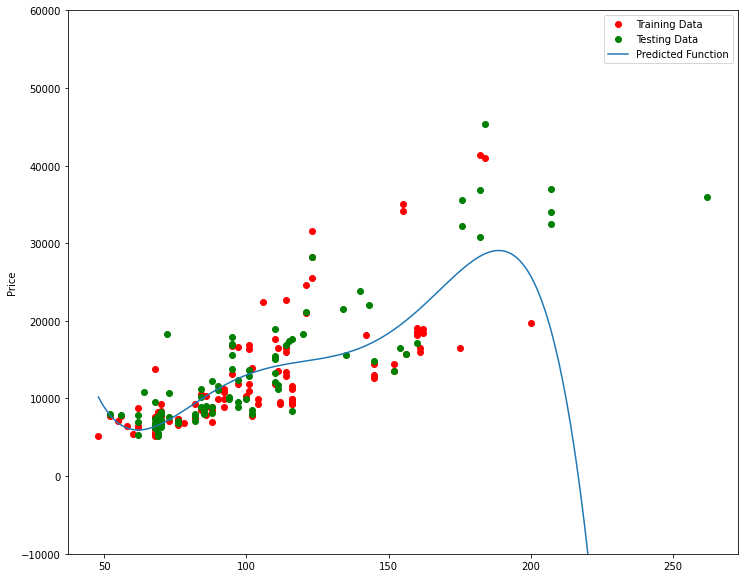

In [68]:
Polynomial_Graph(x_train3[['horsepower']], x_test3[['horsepower']], y_train3, y_test3, poly,pr)

In [ ]:
#The graph shows that the model doesn't fit the data very well. A solution can be changing the degree to find the best model.